# Web-scrapping of Covid19 Data from Worldometers' Website

In [1]:
#Importing the required libraries

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
#Requesting text data from the link

In [4]:
url = 'https://www.worldometers.info/coronavirus/'
link = requests.get(url).text

In [5]:
#Calling the BeautifulSoup Library to increase readibility

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
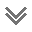

In [6]:
soup = BeautifulSoup(link, 'lxml')
print(soup.prettify())

In [7]:
#Looking for the required table

In [8]:
soup.find_all('table')

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deat

In [9]:
#Finding the required table and extracting the table headers

In [10]:
table = soup.find('table', id = 'main_table_countries_today')

header = []
for th in table.find_all('th'):
    header.append(th.text.replace('\n', ' '))

header

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/ 1M pop ',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [11]:
#Creating the Data Frame using the extracted headers

In [12]:
covid_data = pd.DataFrame(columns = header)

In [13]:
#Filling the Data Frame with data

In [14]:
for i in table.find_all('tr')[1:]:
    row_data = i.find_all('td')
    row = [j.text.replace('\n', ' ') for j in row_data]
    length = len(covid_data)
    covid_data.loc[length] = row

covid_data.shape

(246, 22)

In [15]:
covid_data.head(10)

#    Country,Other   TotalCases  NewCases TotalDeaths NewDeaths  \
0      North America   114,359,956    +5,654   1,524,164       +38   
1               Asia   183,732,353  +286,464   1,467,045      +490   
2             Europe   221,792,165   +62,617   1,903,084      +137   
3      South America    63,644,791             1,325,301             
4            Oceania    12,156,291   +13,798      19,485       +56   
5             Africa    12,606,024               257,368             
6                              721                    15             
7               World  608,292,301  +368,533   6,496,462      +721   
8  1              USA   96,347,971            1,071,420              
9  2            India   44,436,339              527,911              

  TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
0    108,030,194       +9,865   4,805,598            9,387  ...   
1    175,419,277     +380,809   6,846,031           12,746  ...   
2    215,585,036     +115,006   4,304,045            9,182  ...   
3     61,653,835       +4,385     665,655           10,526  ...   
4     11,924,750       +2,884     212,056              129  ...   
5     11,939,669                  408,987            1,025  ...   
6            706                        0                0  ...   
7    584,553,467     +512,949  17,242,372           42,995  ...   
8     92,023,741                3,252,810            4,006  ...   
9     43,845,680                   62,748              698  ...   

      TotalTests Tests/ 1M pop       Population          Continent  \
0                                                    North America   
1                                                             Asia   
2                                                           Europe   
3                                                    South America   
4                                                Australia/Oceania   
5                                                           Africa   
6                                                                    
7                                                              All   
8  1,101,062,482                                     North America   
9    886,147,613        628,781  1,409,310,426                Asia   

  1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           
5                                                                           
6                                                                           
7                                                                           
8                                                                           
9                32              2,670                 2                    

  New Deaths/1M pop Active Cases/1M pop  
0                                        
1                                        
2                                        
3                                        
4                                        
5                                        
6                                        
7                                        
8                                        
9                                    45  

[10 rows x 22 columns]

In [16]:
covid_data.tail(10)

# Country,Other   TotalCases  NewCases TotalDeaths NewDeaths  \
236  229  Saint Helena            7                                   
237  230         China      243,449      +368      5,226              
238             Total:  114,359,956    +5,654   1,524,164       +38   
239             Total:  183,732,353  +286,464   1,467,045      +490   
240             Total:  221,792,165   +62,617   1,903,084      +137   
241             Total:   63,644,791             1,325,301             
242             Total:   12,156,291   +13,798      19,485       +56   
243             Total:   12,606,024               257,368             
244             Total:          721                    15             
245             Total:  608,292,301  +368,533   6,496,462      +721   

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
236              2                        5                   ...   
237        231,925         +405       6,298               34  ...   
238    108,030,194       +9,865   4,805,598            9,387  ...   
239    175,419,277     +380,809   6,846,031           12,746  ...   
240    215,585,036     +115,006   4,304,045            9,182  ...   
241     61,653,835                  665,655           10,526  ...   
242     11,924,750       +2,884     212,056              129  ...   
243     11,939,669                  408,987            1,025  ...   
244            706                        0                0  ...   
245    584,553,467     +512,949  17,242,372           42,995  ...   

      TotalTests Tests/ 1M pop       Population          Continent  \
236                                      6,116              Africa   
237  160,000,000        111,163  1,439,323,776                Asia   
238                                                  North America   
239                                                           Asia   
240                                                         Europe   
241                                                  South America   
242                                              Australia/Oceania   
243                                                         Africa   
244                                                                  
245                                                            All   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
236               874                                                         
237             5,912            275,416                 9              0.3   
238                                                                           
239                                                                           
240                                                                           
241                                                                           
242                                                                           
243                                                                           
244                                                                           
245                                                                           

    New Deaths/1M pop Active Cases/1M pop  
236                                   818  
237                                     4  
238                                        
239                                        
240                                        
241                                        
242                                        
243                                        
244                                        
245                                        

[10 rows x 22 columns]

In [17]:
#Cleaning the Data Frame

In [18]:
covid_data = covid_data[covid_data['#'] != '']
covid_data.reset_index(inplace = True, drop = True)
covid_data.shape

(230, 22)

In [19]:
covid_data.head(10)

# Country,Other  TotalCases  NewCases TotalDeaths NewDeaths  \
0   1           USA  96,347,971            1,071,420              
1   2         India  44,436,339              527,911              
2   3        France  34,529,201              154,093              
3   4        Brazil  34,472,679              684,029              
4   5       Germany  32,184,553              147,494              
5   6            UK  23,521,792              188,242              
6   7      S. Korea  23,327,897   +81,499     26,876       +112   
7   8         Italy  21,867,757              175,595              
8   9        Russia  19,578,730   +49,761    384,441        +95   
9  10         Japan  18,939,344  +167,340     39,880       +316   

  TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
0     92,023,741                3,252,810            4,006  ...   
1     43,845,680                   62,748              698  ...   
2     34,015,188                  359,920              869  ...   
3     33,480,980                  307,670            8,318  ...   
4     31,317,600      +51,600     719,459            1,406  ...   
5     23,205,649         +420     127,901              146  ...   
6     21,329,194     +119,528   1,971,827              555  ...   
7     21,046,229                  645,933              213  ...   
8     18,635,574      +38,940     558,715            2,300  ...   
9     17,110,166     +234,203   1,789,298              555  ...   

      TotalTests Tests/ 1M pop       Population      Continent  \
0  1,101,062,482                                 North America   
1    886,147,613        628,781  1,409,310,426            Asia   
2    271,490,188      4,139,492     65,585,393          Europe   
3     63,776,166        295,502    215,822,801   South America   
4    122,332,384      1,450,081     84,362,457          Europe   
5    522,526,476      7,610,774     68,656,152          Europe   
6     15,804,065        307,685     51,364,453            Asia   
7    242,418,090      4,022,209     60,269,892          Europe   
8    273,400,000      1,871,711    146,069,569          Europe   
9     71,721,798        570,848    125,640,688            Asia   

  1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                                                                           
1                32              2,670                 2                    
2                 2                426                 0                    
3                 6                316                 3                    
4                 3                572                 1                    
5                 3                365                 0                    
6                 2              1,911                 3            1,587   
7                 3                343                 0                    
8                 7                380                 1              341   
9                 7              3,150                 2            1,332   

  New Deaths/1M pop Active Cases/1M pop  
0                                        
1                                    45  
2                                 5,488  
3                                 1,426  
4                                 8,528  
5                                 1,863  
6                 2              38,389  
7                                10,717  
8               0.7               3,825  
9                 3              14,241  

[10 rows x 22 columns]

In [20]:
covid_data.tail(10)

#      Country,Other TotalCases NewCases TotalDeaths NewDeaths  \
220  221              Macao        793                   6              
221  222  Wallis and Futuna        761                   7              
222  223   Diamond Princess        712                  13              
223  224               Niue         70                                  
224  225       Vatican City         29                                  
225  226             Tuvalu         20                                  
226  227     Western Sahara         10                   1              
227  228         MS Zaandam          9                   2              
228  229       Saint Helena          7                                  
229  230              China    243,449     +368      5,226              

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
220            785                        2                   ...   
221            438                      316                   ...   
222            699                        0                   ...   
223             60                       10                   ...   
224             29                        0                   ...   
225                                      20                   ...   
226              9                        0                   ...   
227              7                        0                   ...   
228              2                        5                   ...   
229        231,925         +405       6,298               34  ...   

      TotalTests Tests/ 1M pop       Population          Continent  \
220        7,850         11,743        668,456                Asia   
221       20,508      1,896,431         10,814   Australia/Oceania   
222                                                                  
223                                      1,650   Australia/Oceania   
224                                        805              Europe   
225                                     12,106   Australia/Oceania   
226                                    629,068              Africa   
227                                                                  
228                                      6,116              Africa   
229  160,000,000        111,163  1,439,323,776                Asia   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
220               843            111,409                85                    
221                14              1,545                 1                    
222                                                                           
223                24                                                         
224                28                                                         
225               605                                                         
226            62,907            629,068                                      
227                                                                           
228               874                                                         
229             5,912            275,416                 9              0.3   

    New Deaths/1M pop Active Cases/1M pop  
220                                     3  
221                                29,221  
222                                        
223                                 6,061  
224                                        
225                                 1,652  
226                                        
227                                        
228                                   818  
229                                     4  

[10 rows x 22 columns]

In [21]:
covid_data.drop('#', inplace = True, axis = 1)
covid_data.shape

(230, 21)

In [22]:
covid_data.head(10)

Country,Other  TotalCases  NewCases TotalDeaths NewDeaths TotalRecovered  \
0           USA  96,347,971            1,071,420                92,023,741   
1         India  44,436,339              527,911                43,845,680   
2        France  34,529,201              154,093                34,015,188   
3        Brazil  34,472,679              684,029                33,480,980   
4       Germany  32,184,553              147,494                31,317,600   
5            UK  23,521,792              188,242                23,205,649   
6      S. Korea  23,327,897   +81,499     26,876       +112     21,329,194   
7         Italy  21,867,757              175,595                21,046,229   
8        Russia  19,578,730   +49,761    384,441        +95     18,635,574   
9         Japan  18,939,344  +167,340     39,880       +316     17,110,166   

  NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  ...  \
0                3,252,810            4,006                   ...   
1                   62,748              698           31,531  ...   
2                  359,920              869          526,477  ...   
3                  307,670            8,318          159,727  ...   
4      +51,600     719,459            1,406          381,503  ...   
5         +420     127,901              146          342,603  ...   
6     +119,528   1,971,827              555          454,164  ...   
7                  645,933              213          362,831  ...   
8      +38,940     558,715            2,300          134,037  ...   
9     +234,203   1,789,298              555          150,742  ...   

      TotalTests Tests/ 1M pop       Population      Continent  \
0  1,101,062,482                                 North America   
1    886,147,613        628,781  1,409,310,426            Asia   
2    271,490,188      4,139,492     65,585,393          Europe   
3     63,776,166        295,502    215,822,801   South America   
4    122,332,384      1,450,081     84,362,457          Europe   
5    522,526,476      7,610,774     68,656,152          Europe   
6     15,804,065        307,685     51,364,453            Asia   
7    242,418,090      4,022,209     60,269,892          Europe   
8    273,400,000      1,871,711    146,069,569          Europe   
9     71,721,798        570,848    125,640,688            Asia   

  1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                                                                           
1                32              2,670                 2                    
2                 2                426                 0                    
3                 6                316                 3                    
4                 3                572                 1                    
5                 3                365                 0                    
6                 2              1,911                 3            1,587   
7                 3                343                 0                    
8                 7                380                 1              341   
9                 7              3,150                 2            1,332   

  New Deaths/1M pop Active Cases/1M pop  
0                                        
1                                    45  
2                                 5,488  
3                                 1,426  
4                                 8,528  
5                                 1,863  
6                 2              38,389  
7                                10,717  
8               0.7               3,825  
9                 3              14,241  

[10 rows x 21 columns]

In [23]:
covid_data.tail(10)

Country,Other TotalCases NewCases TotalDeaths NewDeaths  \
220              Macao        793                   6              
221  Wallis and Futuna        761                   7              
222   Diamond Princess        712                  13              
223               Niue         70                                  
224       Vatican City         29                                  
225             Tuvalu         20                                  
226     Western Sahara         10                   1              
227         MS Zaandam          9                   2              
228       Saint Helena          7                                  
229              China    243,449     +368      5,226              

    TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
220            785                        2                             1,186   
221            438                      316                            70,372   
222            699                        0                                     
223             60                       10                            42,424   
224             29                        0                            36,025   
225                                      20                             1,652   
226              9                        0                                16   
227              7                        0                                     
228              2                        5                             1,145   
229        231,925         +405       6,298               34              169   

     ...   TotalTests Tests/ 1M pop       Population          Continent  \
220  ...        7,850         11,743        668,456                Asia   
221  ...       20,508      1,896,431         10,814   Australia/Oceania   
222  ...                                                                  
223  ...                                      1,650   Australia/Oceania   
224  ...                                        805              Europe   
225  ...                                     12,106   Australia/Oceania   
226  ...                                    629,068              Africa   
227  ...                                                                  
228  ...                                      6,116              Africa   
229  ...  160,000,000        111,163  1,439,323,776                Asia   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
220               843            111,409                85                    
221                14              1,545                 1                    
222                                                                           
223                24                                                         
224                28                                                         
225               605                                                         
226            62,907            629,068                                      
227                                                                           
228               874                                                         
229             5,912            275,416                 9              0.3   

    New Deaths/1M pop Active Cases/1M pop  
220                                     3  
221                                29,221  
222                                        
223                                 6,061  
224                                        
225                                 1,652  
226                                        
227                                        
228                                   818  
229                                     4  

[10 rows x 21 columns]

In [24]:
#Exporting the Data Frame to Excel

In [25]:
covid_data.to_excel('Covid_Data.xlsx')